# 1. 딥러닝 이용한 회귀학습

 - https://www.tensorflow.org/api_docs/python/tf/keras/activations
 - https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [4]:
import numpy as np
import pandas as pd

In [5]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #0: 모든 메시지, 1: 정보 숨김, 2: 경고 숨김, 3: 에러만 출력)

import tensorflow as tf
import keras
import multiprocessing
from sklearn.model_selection import train_test_split

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # GPU 비활성화 (CPU 모드 강제)
num_cores = multiprocessing.cpu_count()

tf.config.threading.set_intra_op_parallelism_threads(num_cores)
tf.config.threading.set_inter_op_parallelism_threads(num_cores)


In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

### - 딥러닝 손실함수

회귀는 평균제곱 계열을 사용하고 분류에는 엔트로피 계열을 사용한다.

1. 평균제곱 계열
    - mean_squared_error : 평균제곱오차
    - mean_absolute_error : 평균절대오차. 실제 값과 예측 값 차이의 절대값 평균
    - mean_absolute_percentage_error: 평균 절대 백분율 오차. 절대값 오차를 절대값으로 나눈 후 평균
    - mean_squared_logarithimc_error : 평균 제곱 로그 오차. 실제 값과 예측 값에 로그를 적용한 값의 차이를 제곱한 값의 평균
  
1. 교차 엔트로피
    - categorical_crossentropy: 범주형교차엔트로피. 분류.
    - binary_crossentropy(이항교차엔트로피): 0, 1을 선택하는 경우.

### 간단한 회귀

In [7]:
# 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = np.array([0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66])
Y = np.array([12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42])


In [8]:
model = keras.Sequential()
model.add(keras.layers.Input((1,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# adam = keras.optimizers.Adam(learning_rate=0.0009)
sgd = keras.optimizers.SGD(learning_rate=0.0009)
model.compile(optimizer=sgd, loss='mse')

In [10]:
model.fit(X, Y, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 251.8169
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 250.3035
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 248.8229
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 247.3782
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 245.9563
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 244.5472
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 243.1477
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 241.7472
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 240.3435
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 238.9378
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 237.5418
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 236.1402
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 234.7325
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 233.3203
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

In [11]:
# 딥러닝 네트워크의 Y값 예측
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[15.043095 ],
       [16.431683 ],
       [13.853397 ],
       [15.374609 ],
       [14.039396 ],
       [15.1163845],
       [15.714123 ],
       [16.003338 ],
       [16.41754  ],
       [15.877592 ],
       [16.53068  ],
       [15.92789  ],
       [15.751845 ],
       [15.387184 ],
       [16.403399 ],
       [15.27734  ]], dtype=float32)

In [12]:
Y

array([12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65,
       14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step


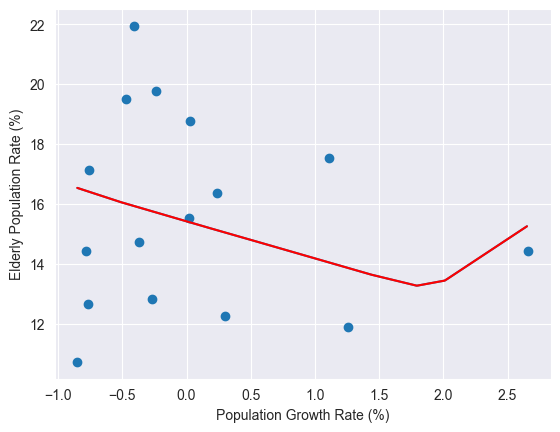

In [13]:
# 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)

line_y = model.predict(line_x)

plt.plot(line_x, line_y)
plt.scatter(X, Y)
plt.plot(line_x, line_y, color='red')

plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 2. 보스턴 주택 가격 회귀 분석

Boston Housing Dataset
 - https://lib.stat.cmu.edu/datasets/boston
 - 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터
 - 주요 특징별 주택 가격을 예측해 보겠습니다.



> `지도학습-회귀2_Boston.ipynb` 에서 데이터에 대한 내용을 참고

13개의 특성은 다음과 같습니다:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's


In [14]:
# 데이터 불러오기
from keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


데이터 포인트가 506개로 비교적 개수가 적고 404개는 훈련 샘플로 102개는 테스트 샘플로 나누어져 있습니다.


In [15]:
train_X.shape,train_Y.shape

((404, 13), (404,))

target 은 주택 가격이다

In [16]:
train_Y.min(),train_Y.max()

(5.0, 50.0)

입력 데이터에 있는 각 특성(예를 들어 범죄율)은 스케일이 서로 다릅니다. 어떤 값은 0과 1 사이의 비율을 나타내고 어떤 것은 1과 12 사이의 값을 가지거나 1과 100 사이의 값을 가집니다.

In [17]:
train_X.min(),train_X.max()

(0.0, 711.0)

상이한 스케일을 가진 값을 신경망에 주입하면 문제가 됩니다. 네트워크가 이런 다양한 데이터에 자동으로 맞추려고 할 수 있지만 이는 확실히 학습을 더 어렵게 만듭니다.

이런 데이터를 다룰 때 대표적인 방법은 특성별로 정규화를 하는 것입니다. 입력 데이터에 있는 각 특성(입력 데이터 행렬의 열)에 대해서 특성의 평균을 빼고 표준 편차로 나눕니다. 특성의 중앙이 0 근처에 맞춰지고 표준 편차가 1이 됩니다.

### "실습" scikit-StandardScaler, RobustScaler

In [18]:
# 데이터 전처리(정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [19]:
# Boston Housing Dataset 회귀 모델 생성
model =  tf.keras.Sequential([
    keras.layers.Input((13,)),
    tf.keras.layers.Dense(units=52, activation='relu'),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 52)             │           728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 39)             │         2,067 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 26)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,862 (15.09 KB)

 Trainable params: 3,862 (15.09 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
(13 + 1) * 52

728

In [21]:
%pip install tqdm ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [22]:
rmsp = keras.optimizers.RMSprop(learning_rate=0.001)
adm = keras.optimizers.Adam(learning_rate=0.07)
model.compile(optimizer=adm, loss='mse', metrics=['accuracy'])

In [23]:
from tqdm.keras import TqdmCallback

# 회귀 모델 학습
history = model.fit(
    train_X,
    train_Y,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[TqdmCallback(verbose=0)]
)

0epoch [00:00, ?epoch/s]

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 3.7794 - val_accuracy: 0.0000e+00 - val_loss: 0.8043
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4904 - val_accuracy: 0.0000e+00 - val_loss: 0.6538
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4536 - val_accuracy: 0.0000e+00 - val_loss: 0.3562
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2904 - val_accuracy: 0.0000e+00 - val_loss: 0.2331
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2576 - val_accuracy: 0.0000e+00 - val_loss: 0.2778
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3275 - val_accuracy: 0.0000e+00 - val_loss: 0.1767
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1664 - val_accuracy: 0.0000e+00 - val_loss: 0.1927
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

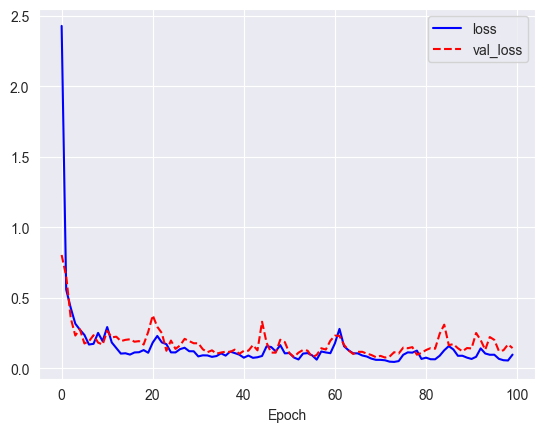

In [25]:
# 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
# 'accr', 'val_accr'
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [26]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.2177


[0.26485803723335266, 0.0]

### 주택 가격 예측

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


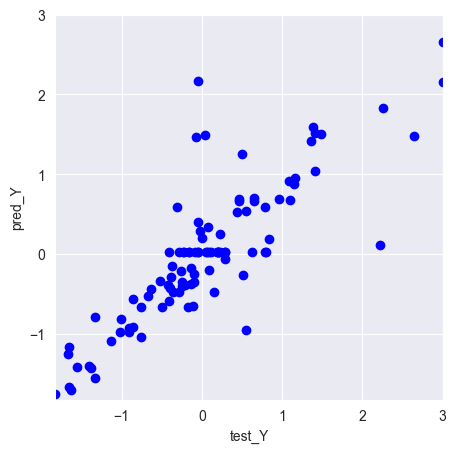

In [27]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_y, 'bo')

plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선

plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

## EarlyStopping Callback 사용

In [28]:
model3 =  tf.keras.Sequential([
    keras.layers.Input((13,)),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=30, activation='relu'),
    tf.keras.layers.Dense(units=1)
])


In [29]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,011 (31.29 KB)

 Trainable params: 8,011 (31.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
               loss='mse',
               metrics=['mae','mse'])

In [31]:
# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history =  model3.fit(
    train_X,
    train_Y,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    # verbose=0,
    # callbacks=[early_stop]
)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6227 - mae: 1.6415 - mse: 7.6227 - val_loss: 0.6987 - val_mae: 0.5636 - val_mse: 0.6987
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7032 - mae: 0.5215 - mse: 0.7032 - val_loss: 0.5470 - val_mae: 0.4662 - val_mse: 0.5470
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4685 - mae: 0.4195 - mse: 0.4685 - val_loss: 0.3550 - val_mae: 0.3841 - val_mse: 0.3550
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2217 - mae: 0.3029 - mse: 0.2217 - val_loss: 0.3174 - val_mae: 0.3879 - val_mse: 0.3174
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3084 - mae: 0.4143 - mse: 0.3084 - val_loss: 0.4371 - val_mae: 0.4714 - val_mse: 0.4371
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4574 - mae: 0.4836 - mse: 0.4574 - val_loss: 0.3826 - val_mae: 0.4148 - val_mse: 0.3826
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4305 - mae: 0.4329 - mse: 0.4305 - val_loss: 

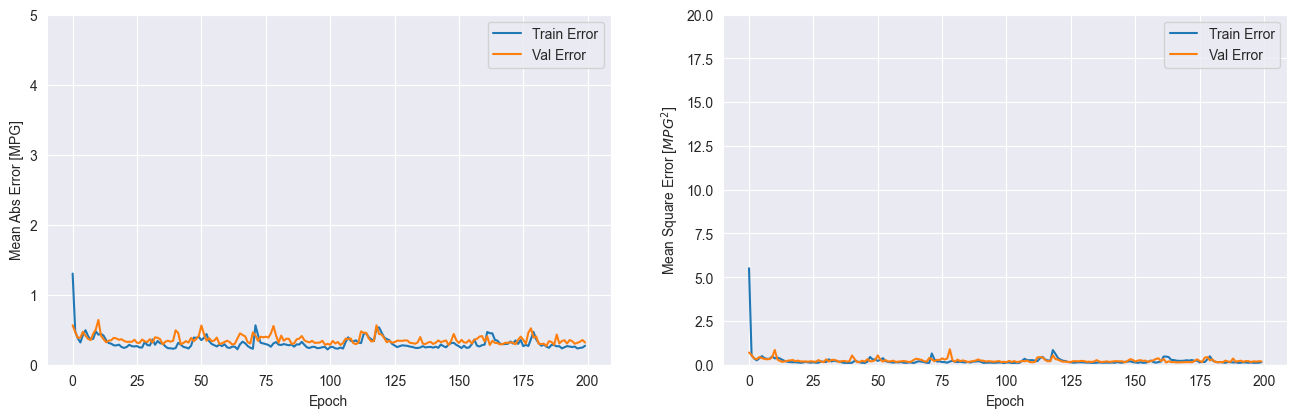

In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],
       label = 'Val Error')
plt.ylim([0,5])
plt.legend()

plt.subplot(2,2,2)
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'],
       label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],
       label = 'Val Error')
plt.ylim([0,20])
plt.legend()
plt.show()

In [33]:
loss, mae, mse = model3.evaluate(test_X, test_Y, verbose=2)

print("테스트 세트 MAE: {:5.2f}".format(mae))
print("테스트 세트 MSE: {:5.2f}".format(mse))

4/4 - 0s - 4ms/step - loss: 0.3750 - mae: 0.3837 - mse: 0.3750
테스트 세트 MAE:  0.38
테스트 세트 MSE:  0.37


## 예측

마지막으로 테스트 세트에 있는 샘플을 사용해  가격을 예측해 보겠습니다:

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/stepWARNING:tensorflow:5 out of the last 19 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x36f556430> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


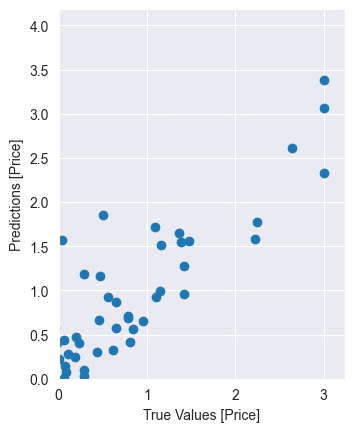

In [34]:
test_predictions = model3.predict(test_X).flatten()

plt.scatter(test_Y, test_predictions)


plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.show()

오차의 분포를 살펴 보죠.

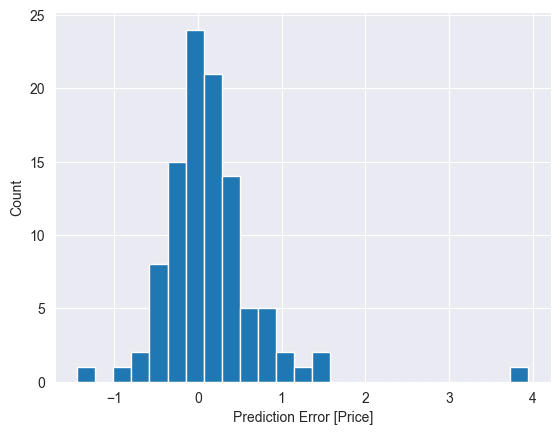

In [35]:
error = test_predictions - test_Y
plt.hist(error, bins = 25)

plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")
plt.show()